In [1]:
import pandas as pd
pd.options.display.max_columns = 999

from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("player_stats.csv")

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


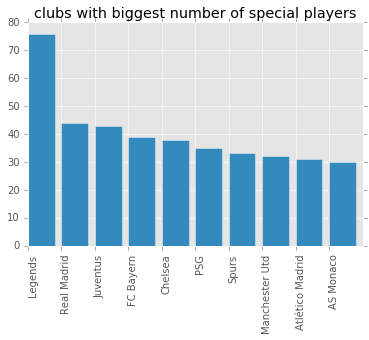

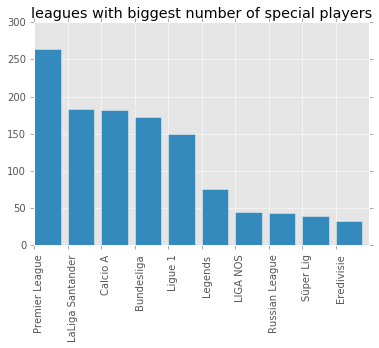

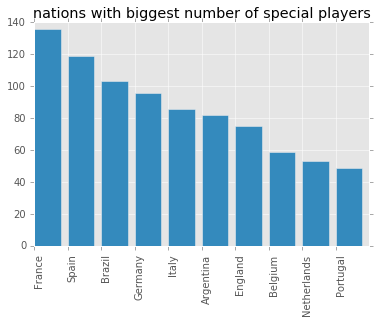

In [3]:
# get clubs, leagues and nations with the biggest number of special cards
for col in ["club", "league", "nation"]:
    temp = df[df["revision"] != "Normal"].groupby([col]).size().sort_values(ascending=False)[:10].reset_index()
    temp.columns = [col, "special_players"]
    f, ax = plt.subplots()
    ax.bar(range(10), temp.special_players, tick_label=temp[col].values)
    ax.set_xticklabels(temp[col].values, rotation='vertical', ha='left')
    ax.set_title("{}s with biggest number of special players".format(col))
    f.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


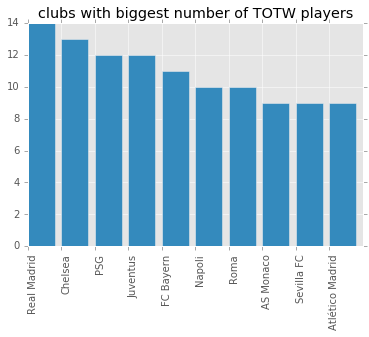

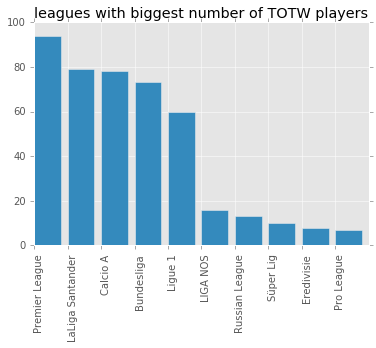

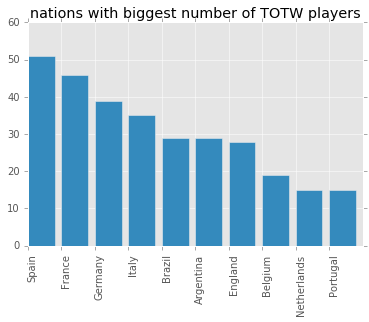

In [4]:
# get clubs, leagues and nations with the biggest number of special cards
for col in ["club", "league", "nation"]:
    temp = df[df["revision"].isin(["IF", "FIF"])].groupby([col]).size().sort_values(ascending=False)[:10].reset_index()
    temp.columns = [col, "special_players"]
    f, ax = plt.subplots()
    ax.bar(range(10), temp.special_players, tick_label=temp[col].values)
    ax.set_xticklabels(temp[col].values, rotation='vertical', ha='left')
    ax.set_title("{}s with biggest number of TOTW players".format(col))
    f.show()

In [5]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
import re

In [7]:
informs = df[df["revision"].isin(["IF", "FIF"])].copy()
informs["origin"] = informs["origin"].apply(lambda x: int(re.search("\d+", x).group(0)))


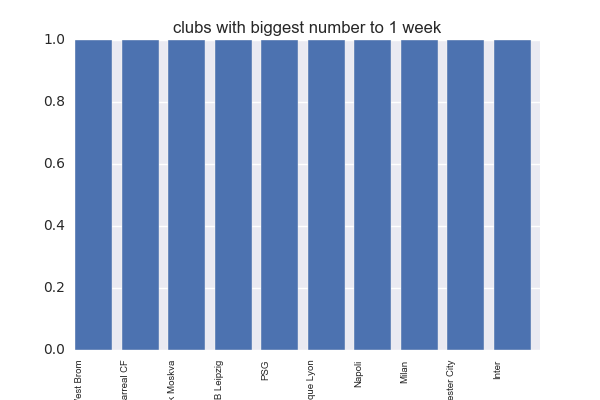
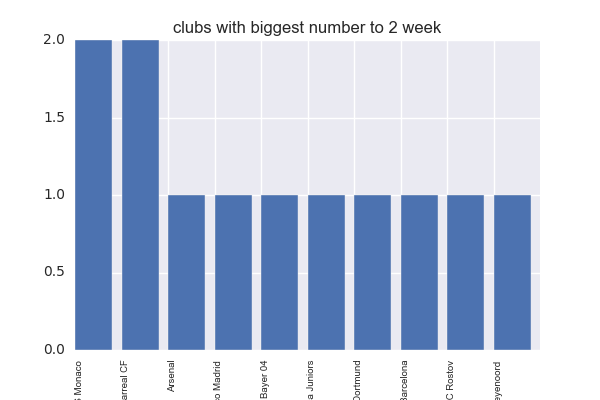
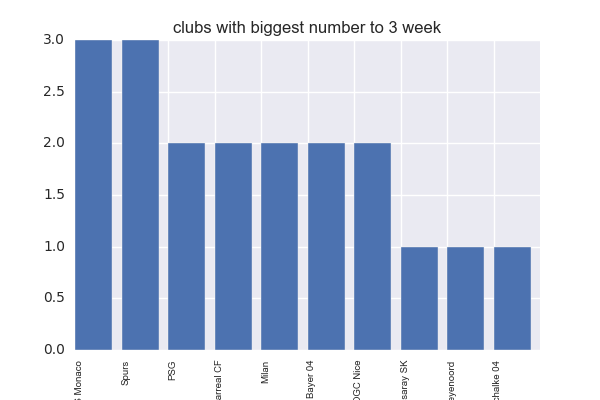
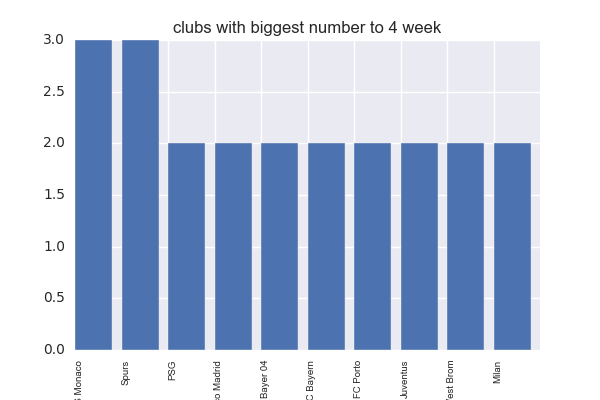
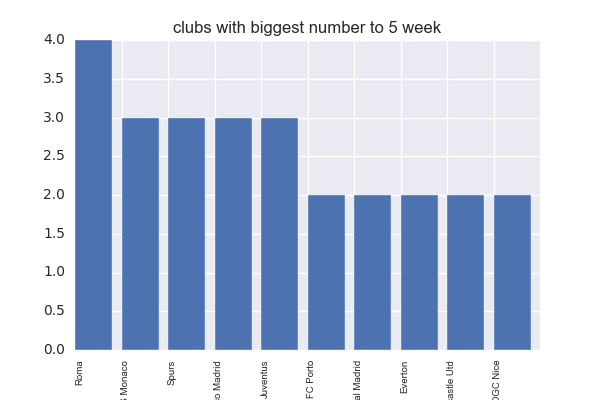
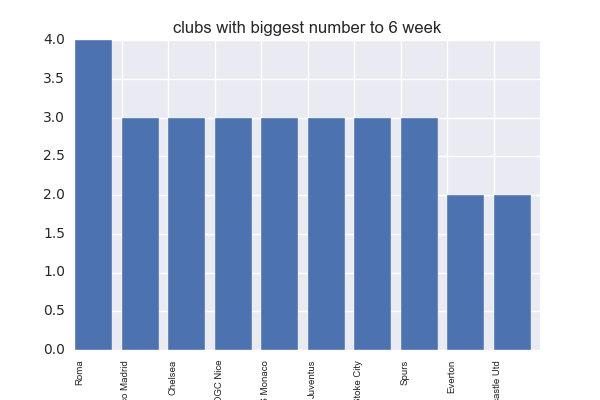
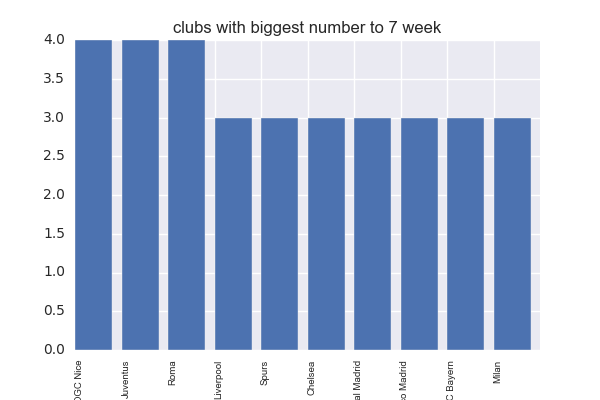
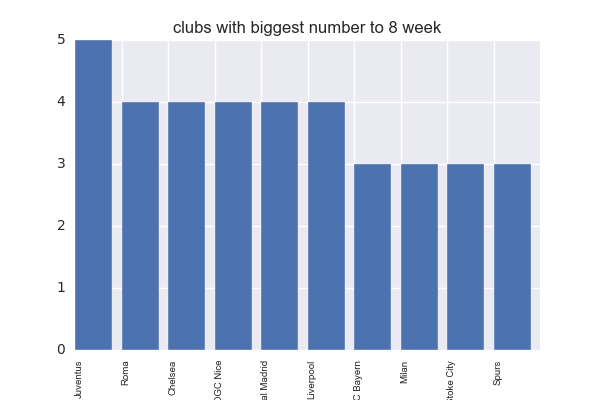
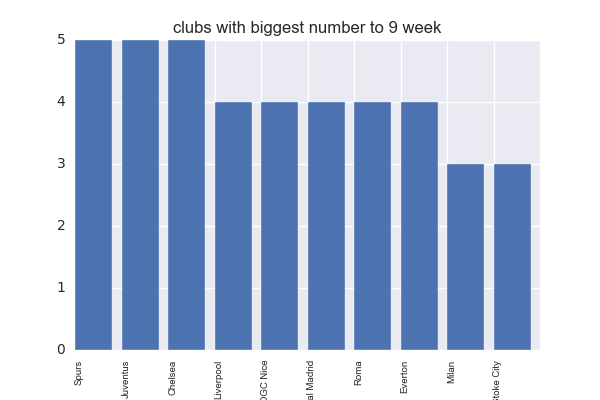
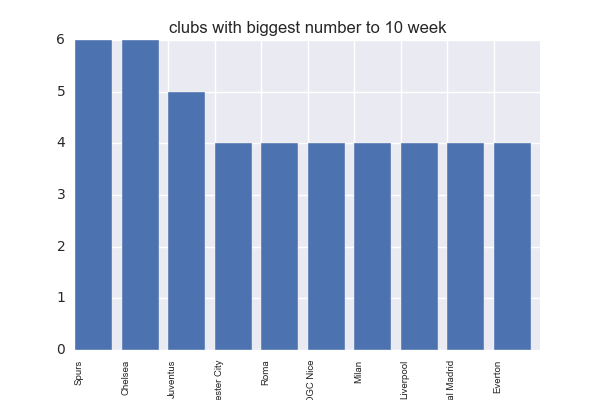
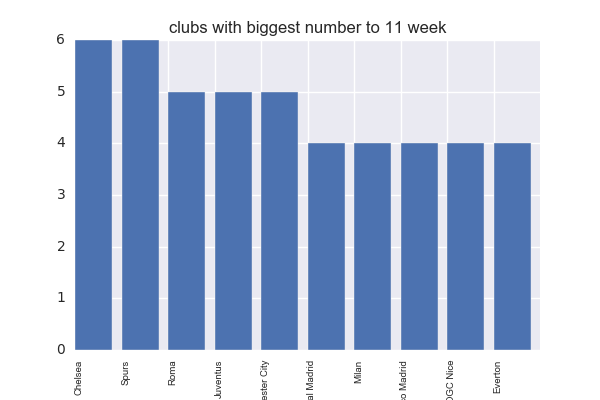
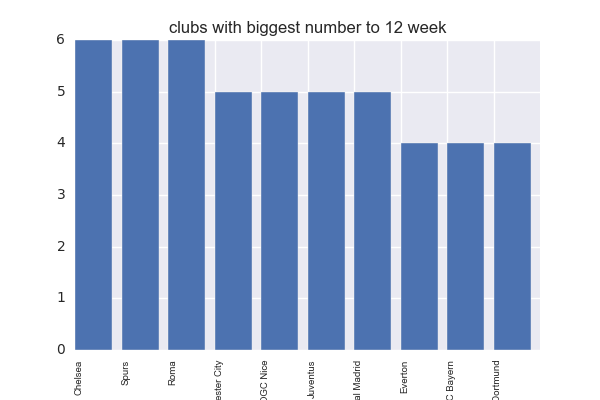
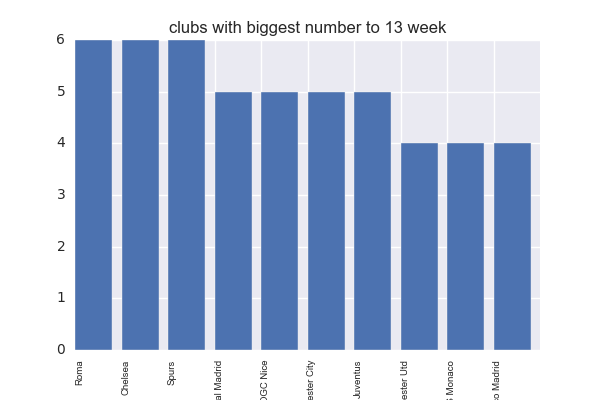
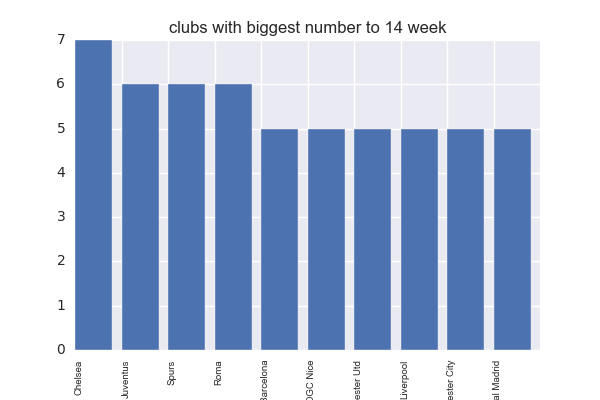
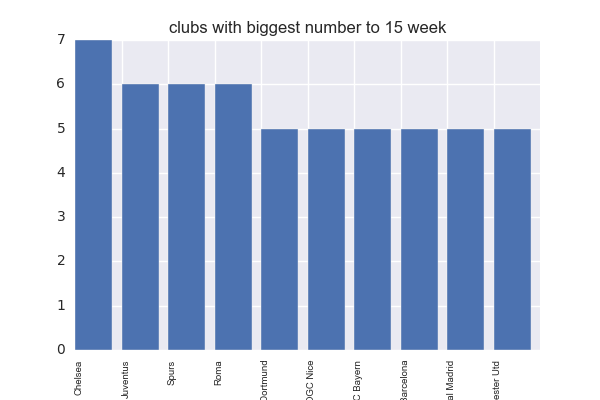
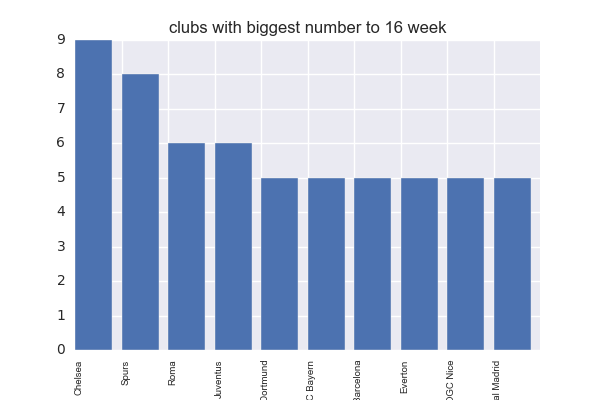
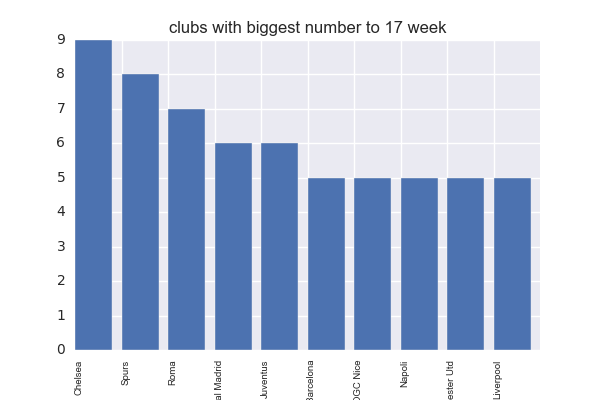
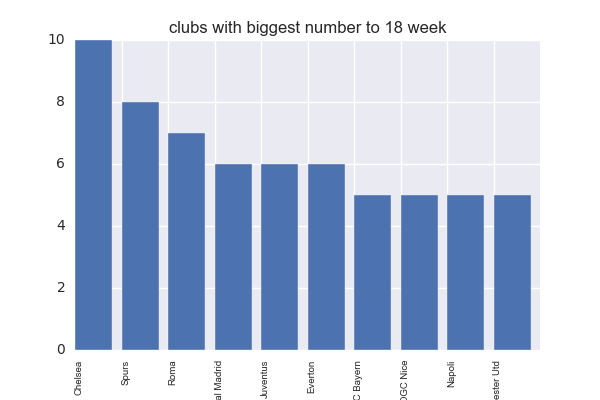
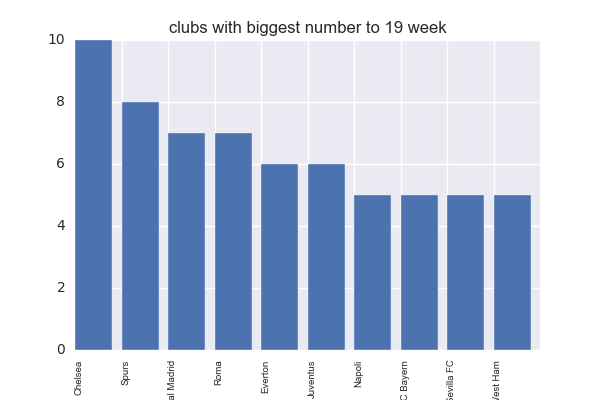
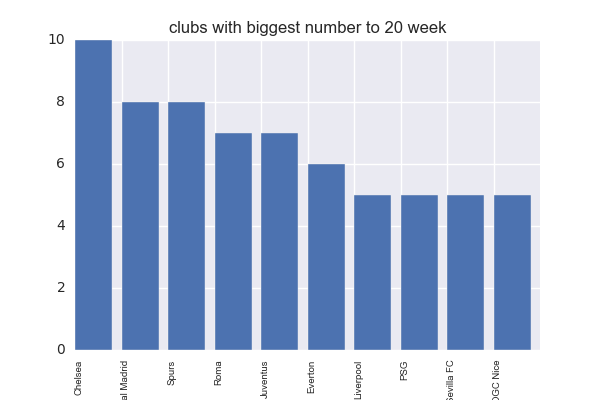
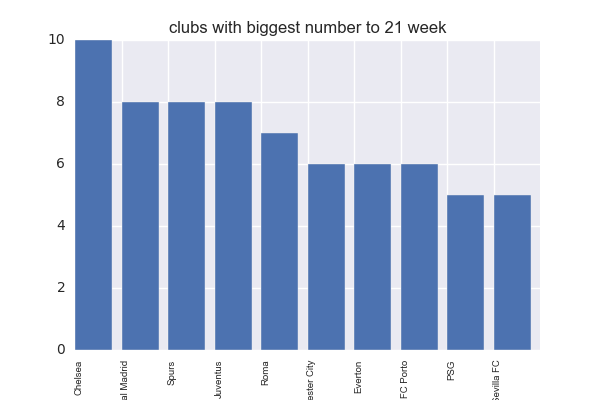
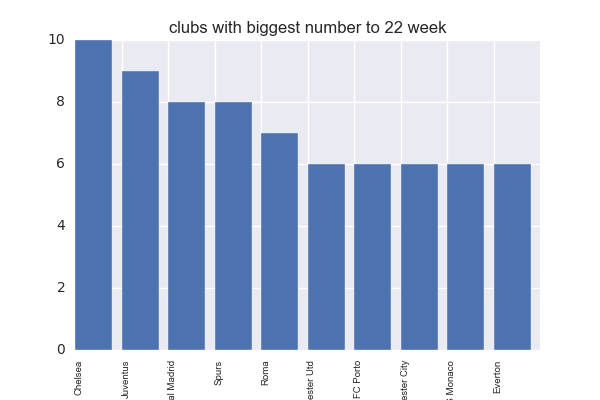
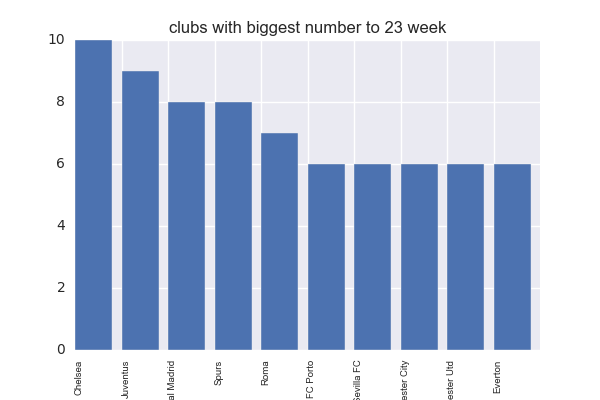
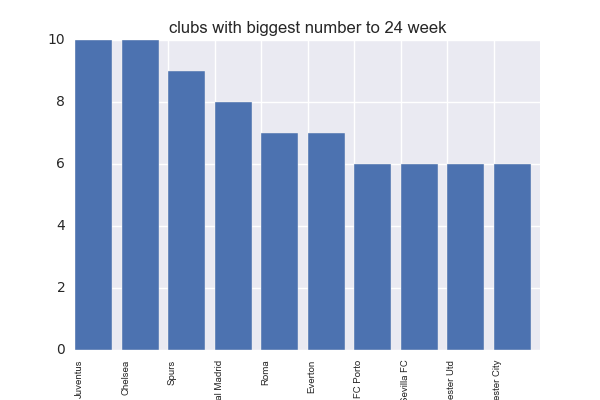
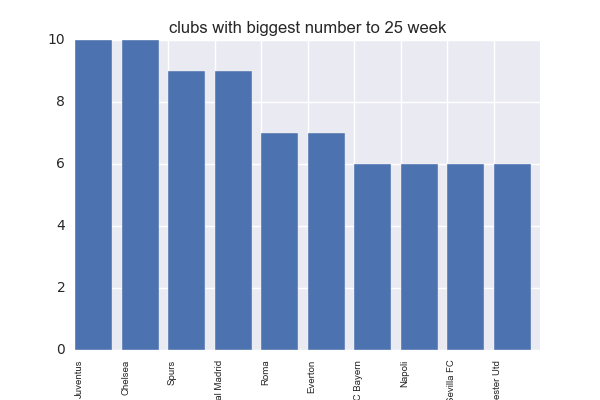
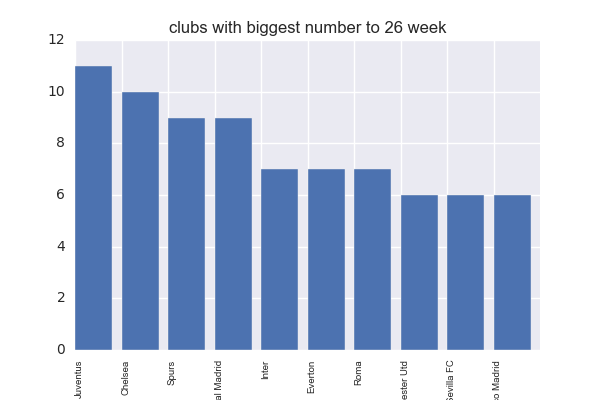
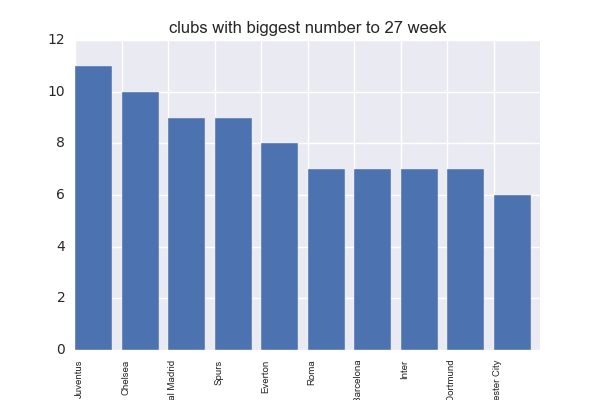
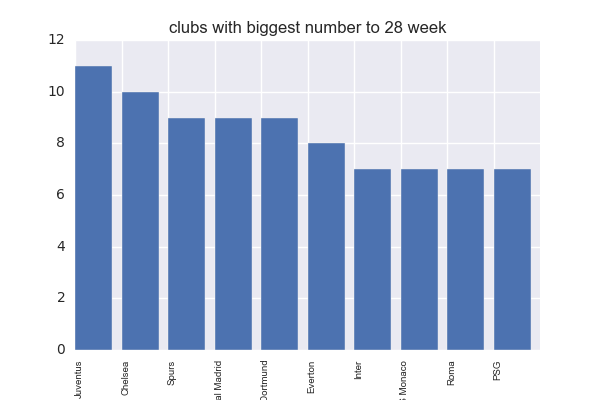
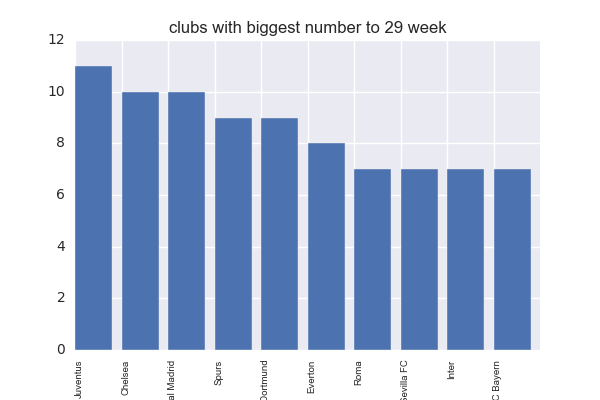
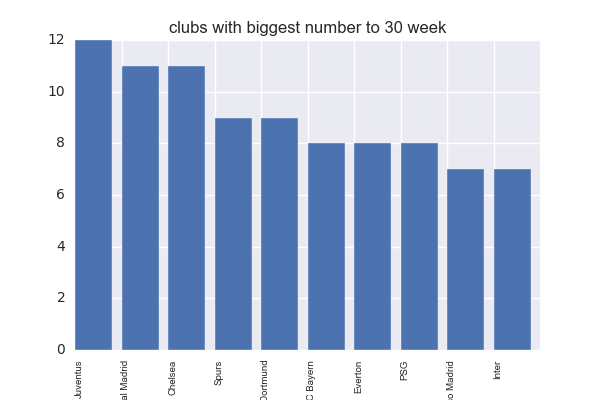
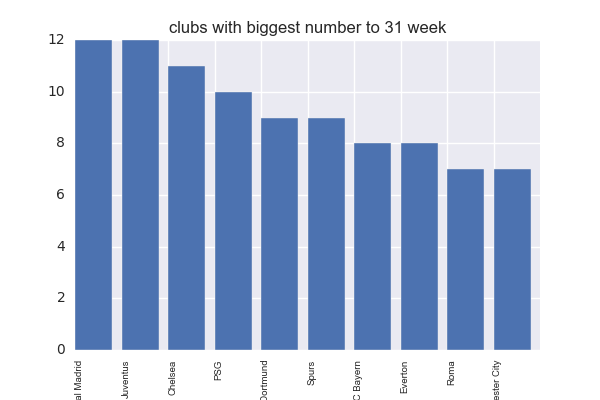
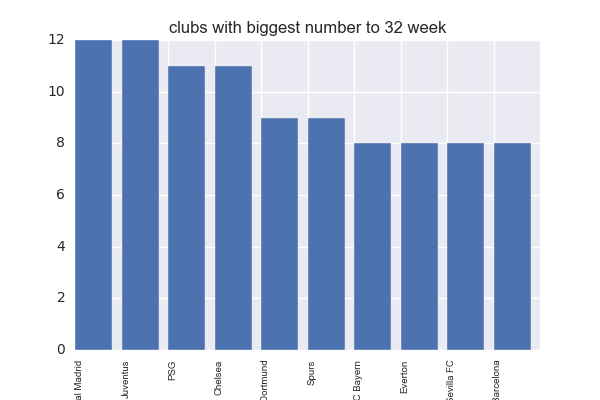
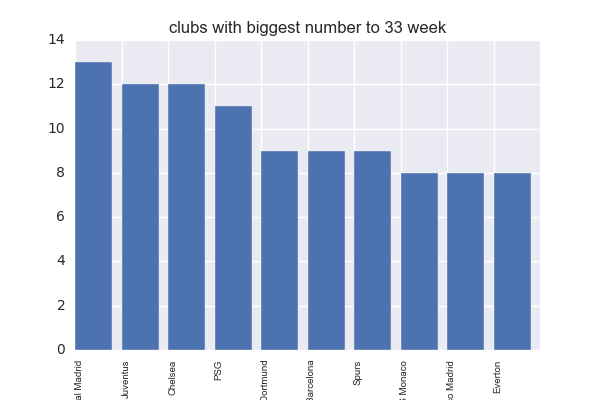
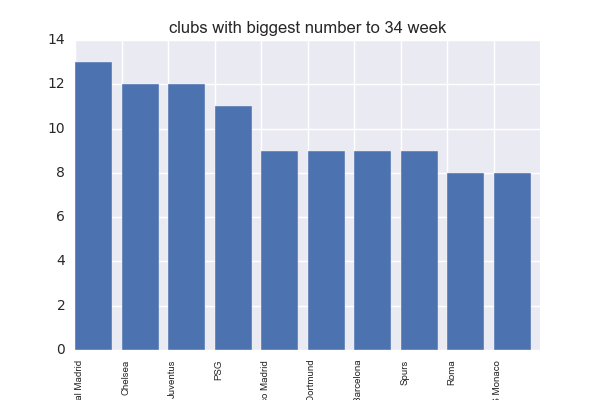
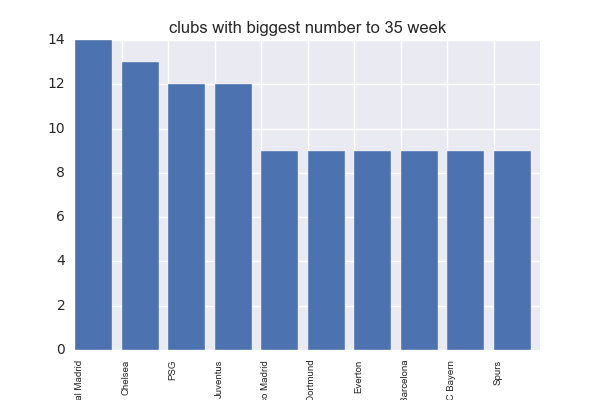
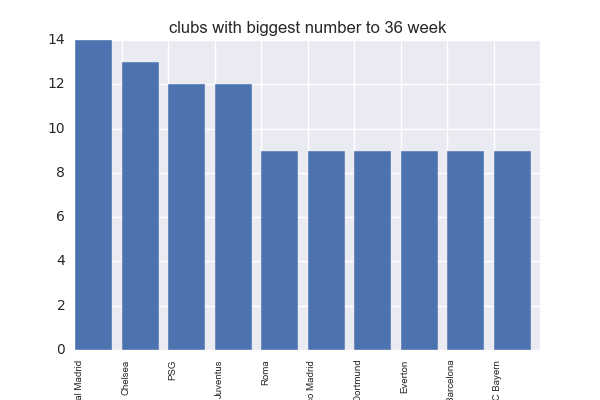
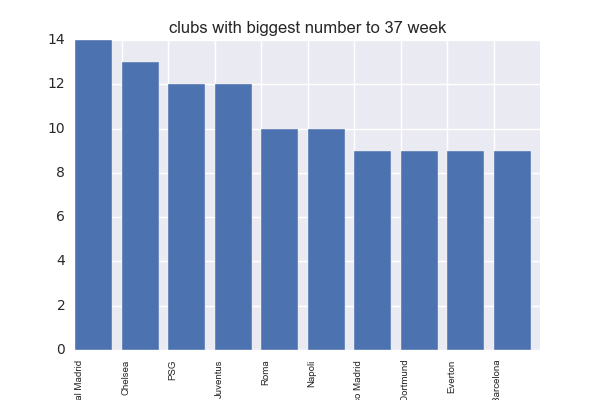
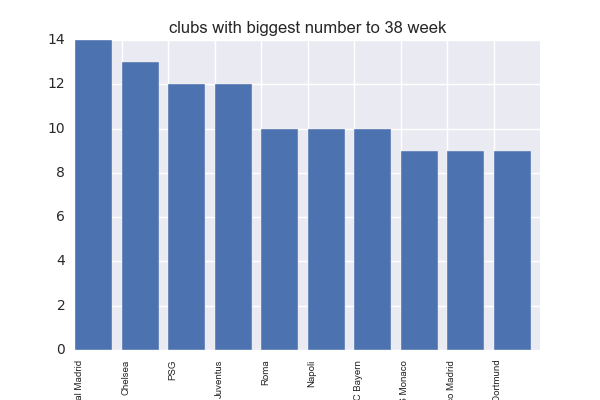
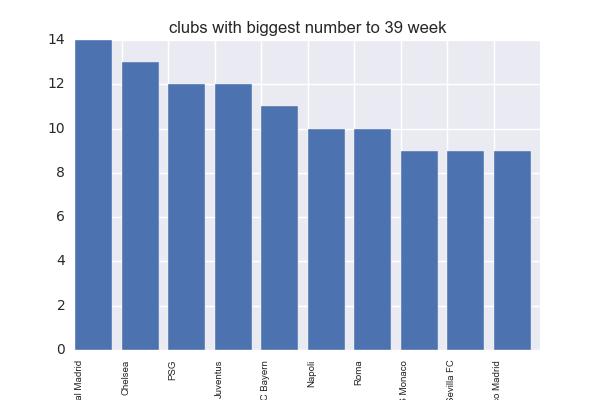

In [8]:
fig, ax = plt.subplots()

def animate(i):
    data = informs[informs["origin"] <= i].groupby([col]).size().sort_values(ascending=False)
    n_nations = np.min([10, len(data)])
    data = data[:n_nations].reset_index()
    data.columns = [col, "special_players"]
    ax.clear()
    ax.bar(range(n_nations), data.special_players, tick_label=data[col].values)
    ax.set_xticklabels(data[col].values, rotation='vertical', ha='left', size='x-small')
    ax.set_title("{}s with biggest number to {} week".format(col, i))

col="club"
animation.FuncAnimation(fig, animate, frames=range(1,40), interval=1000, )


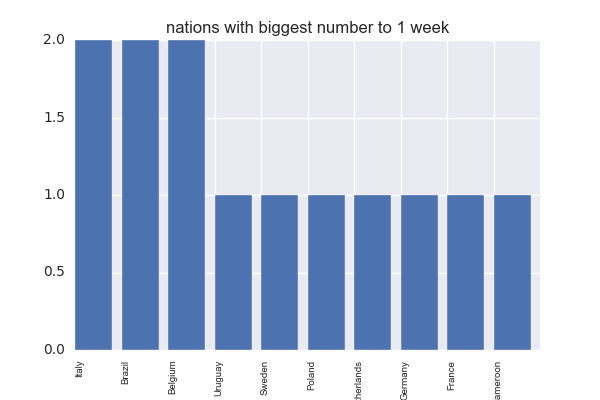
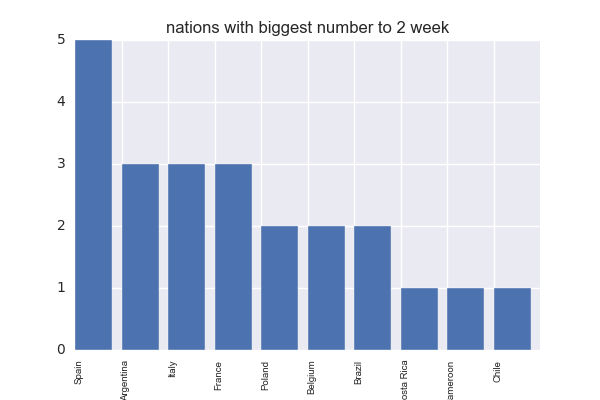
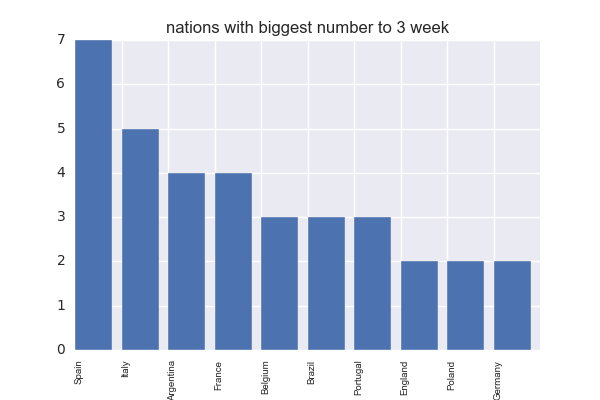
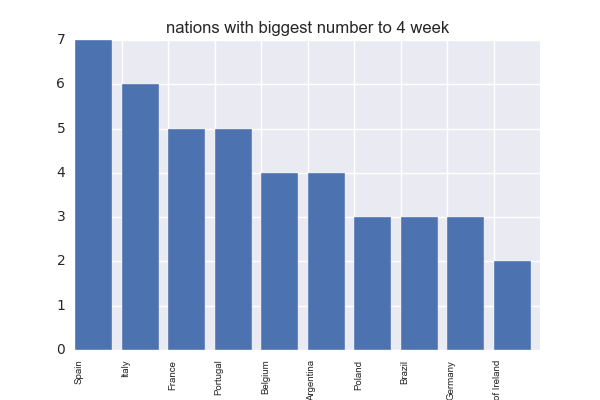
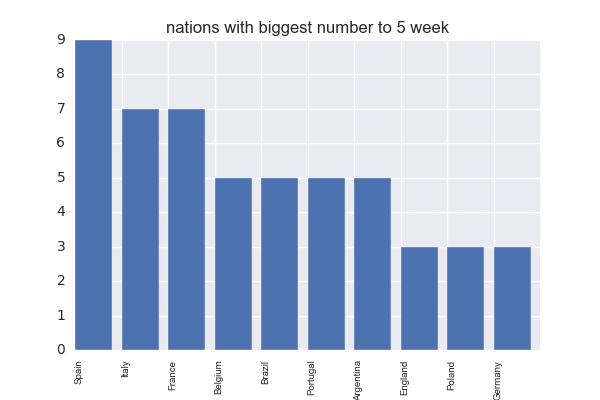
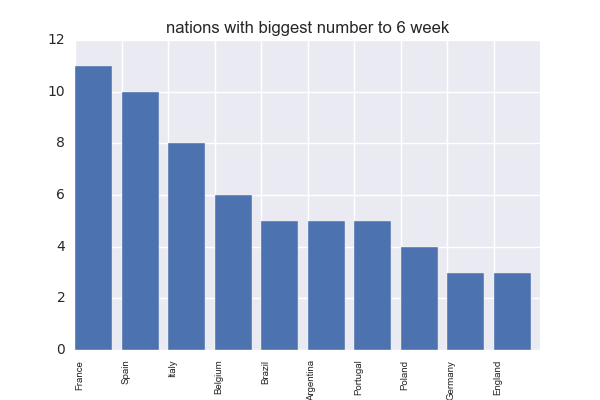
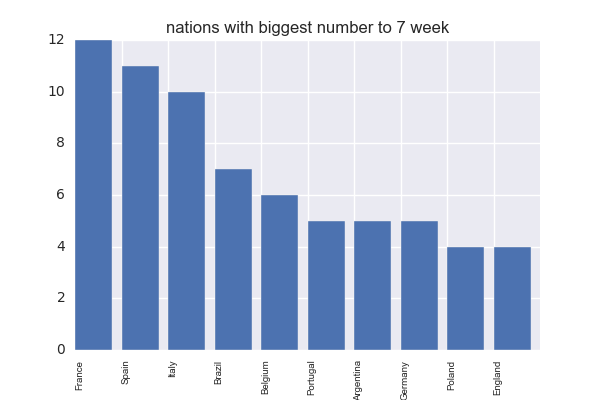
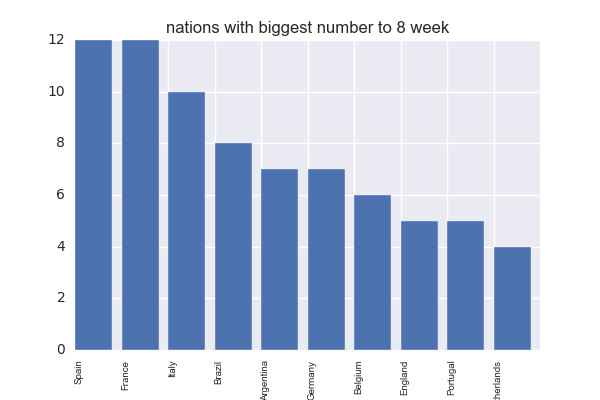
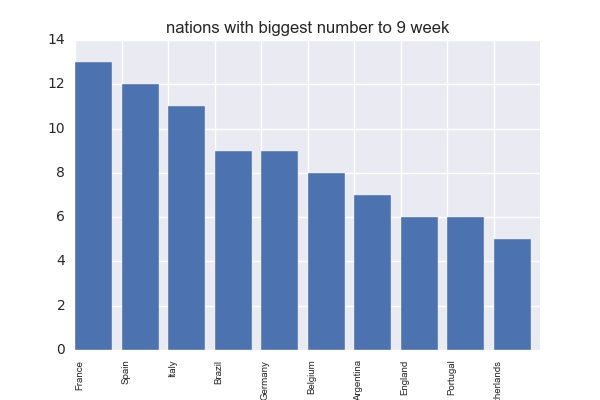
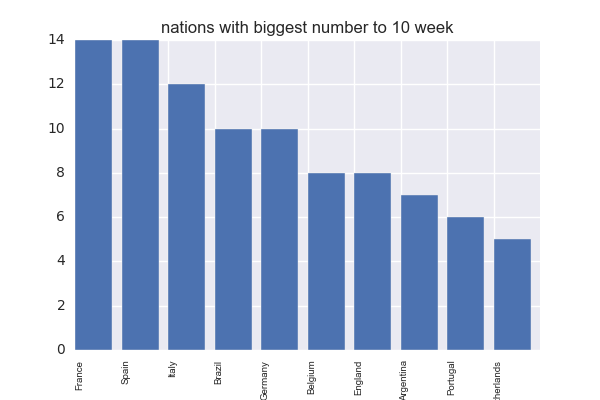
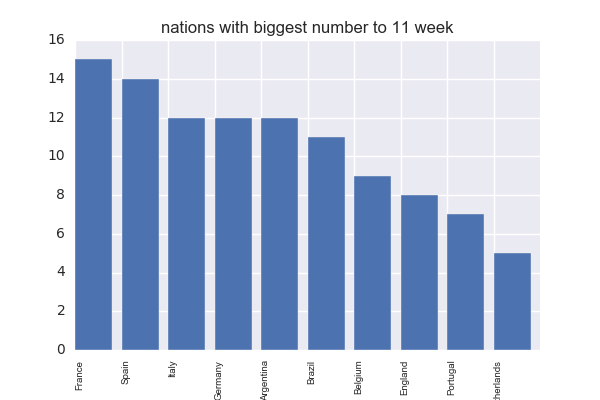
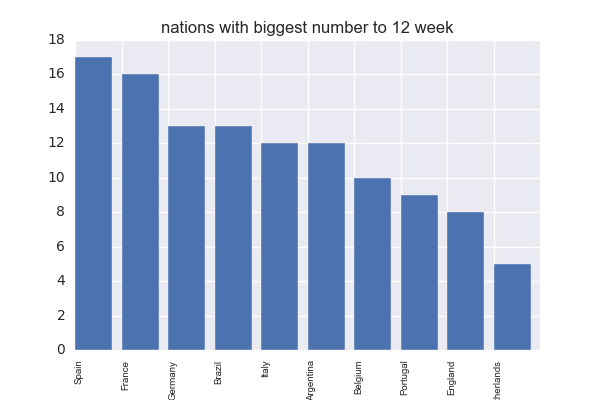
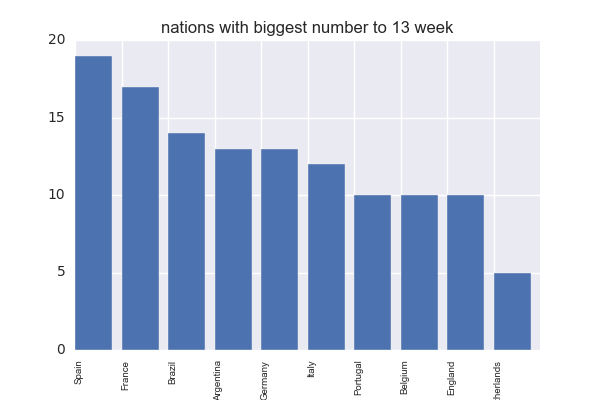
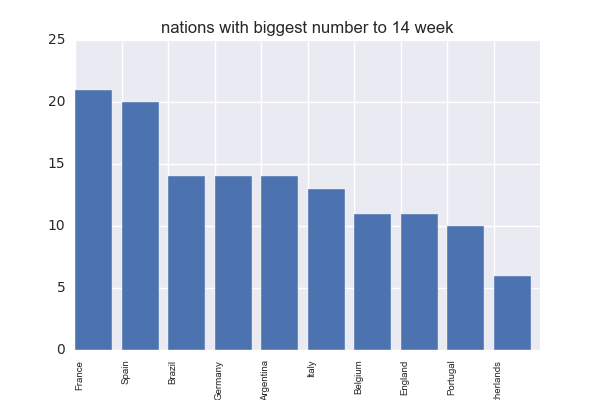
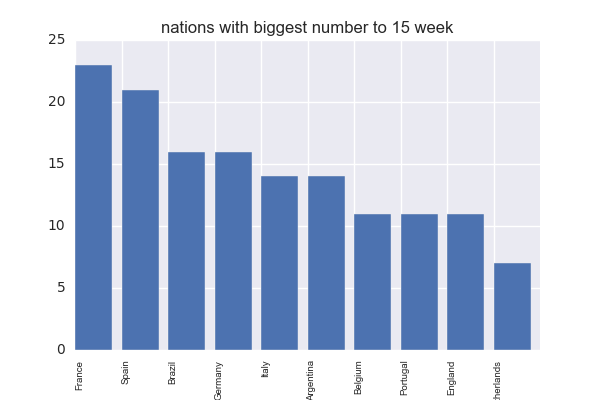
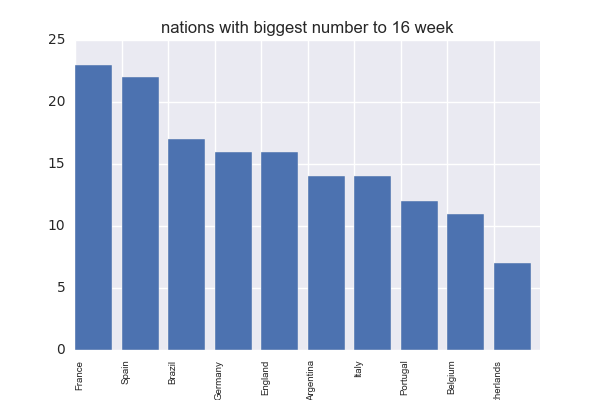
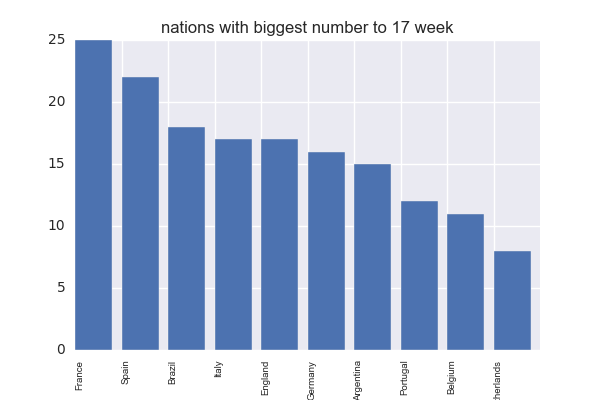
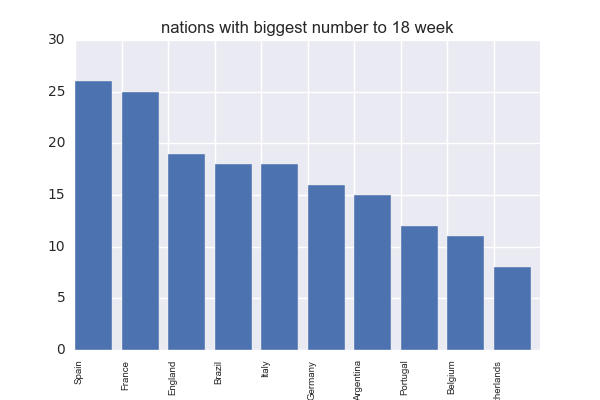
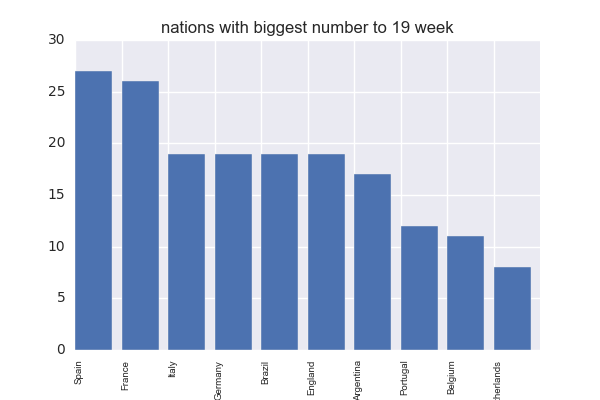
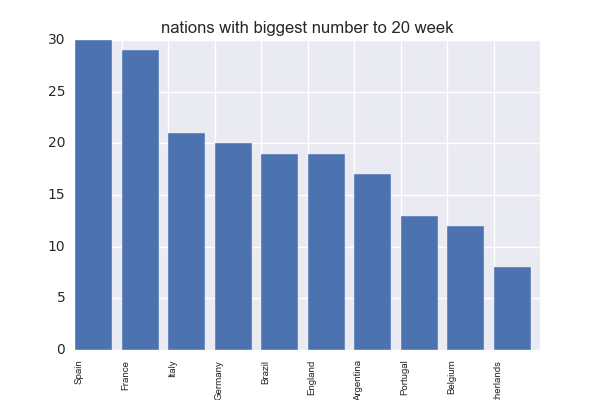
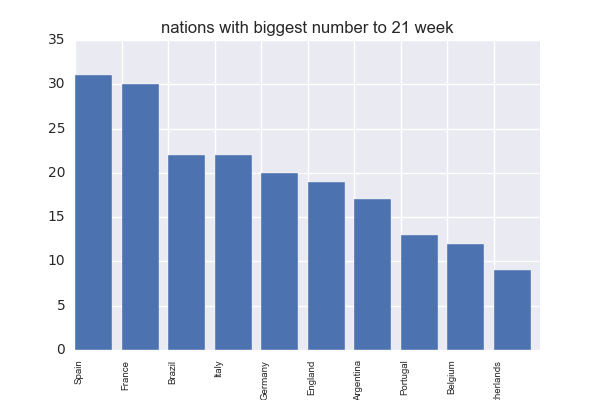
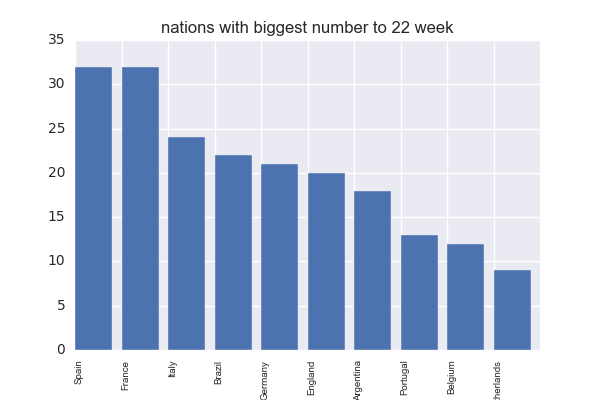
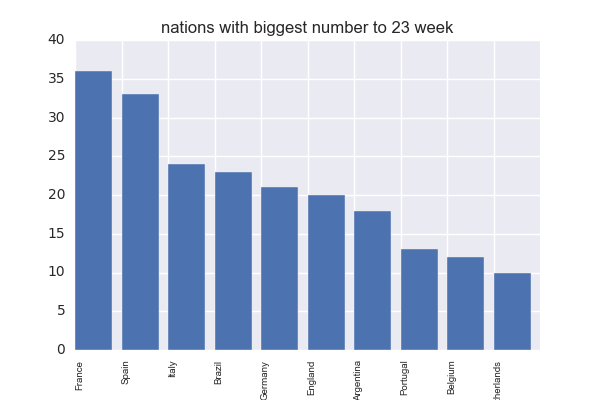
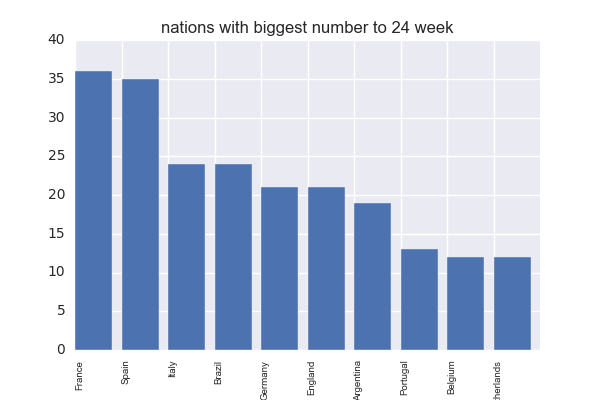
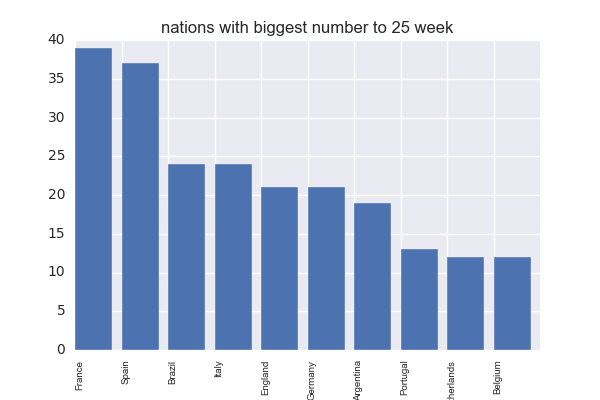
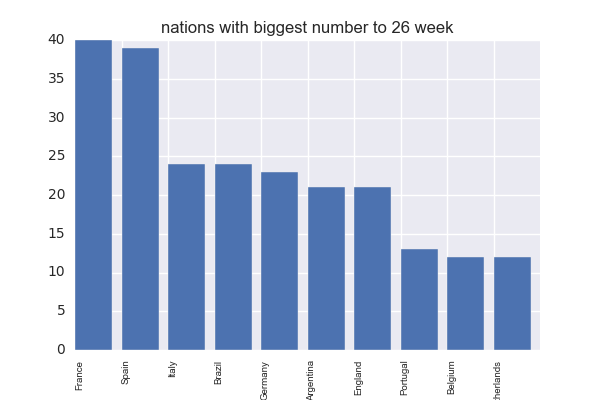
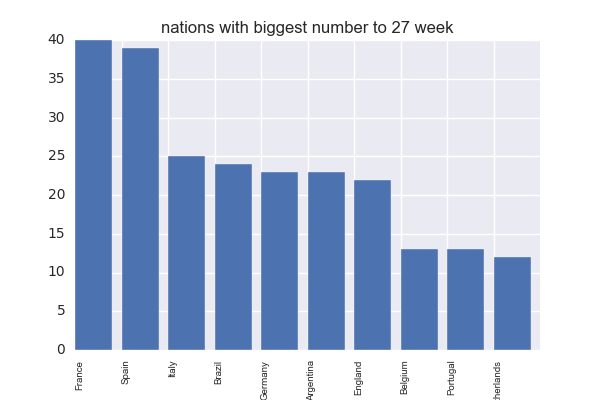
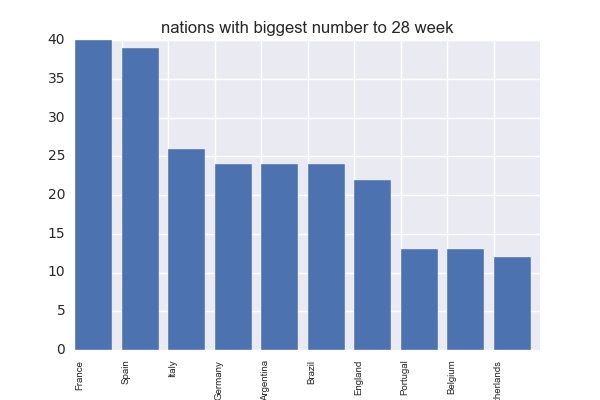
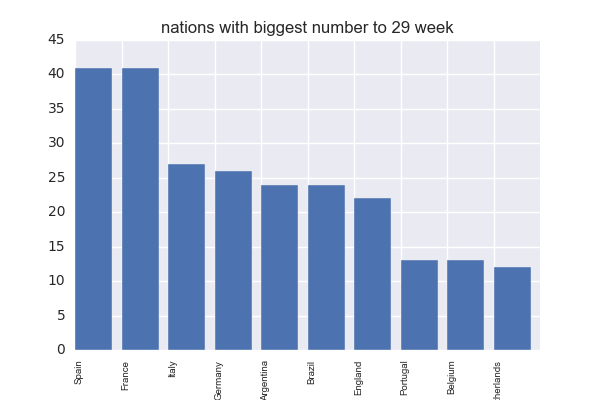
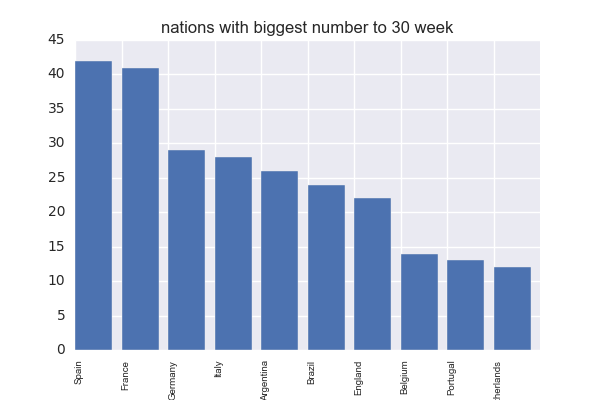
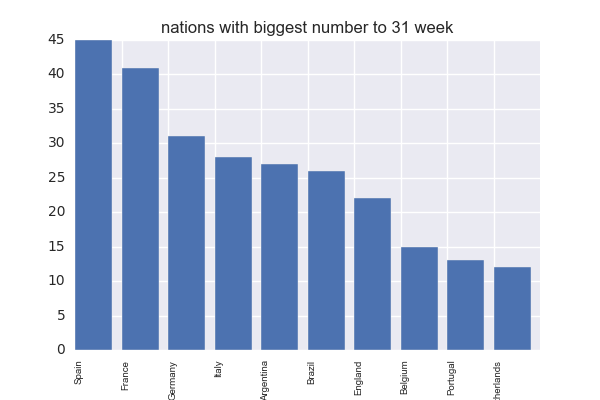
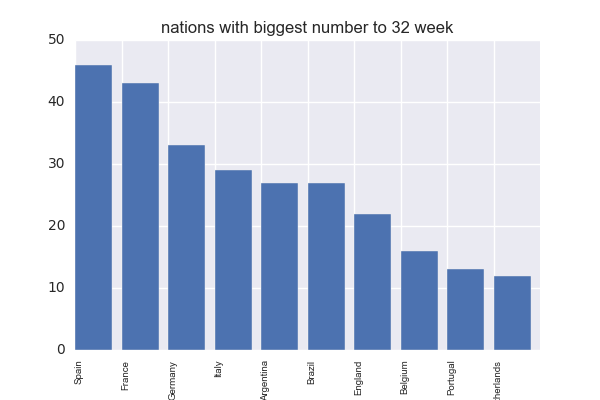
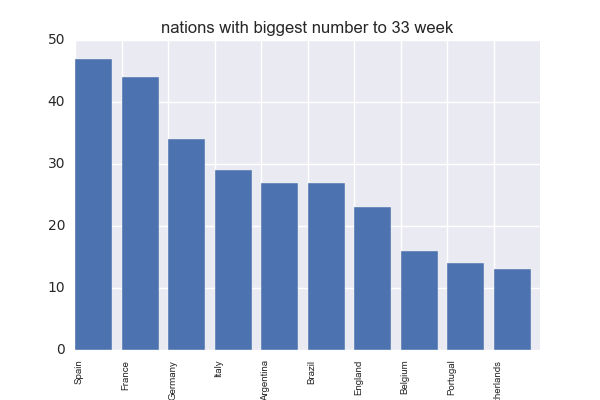
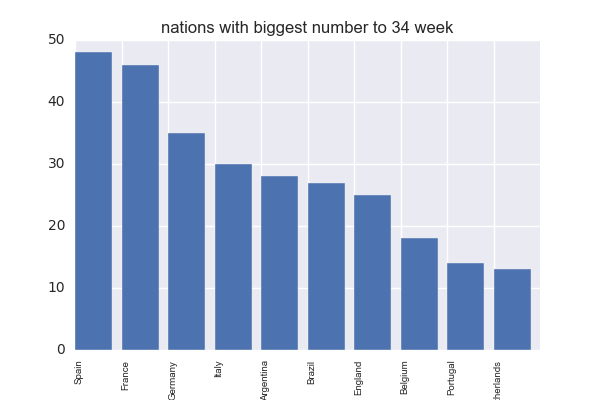
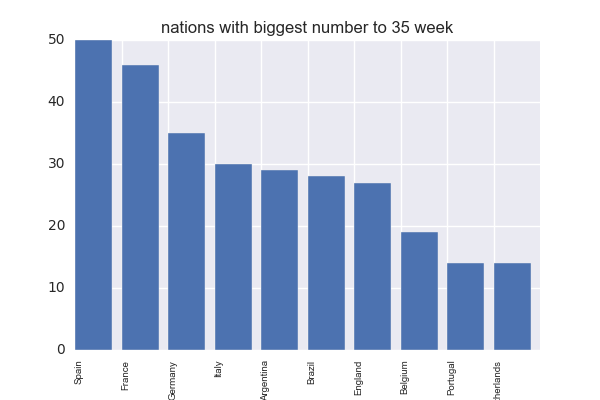
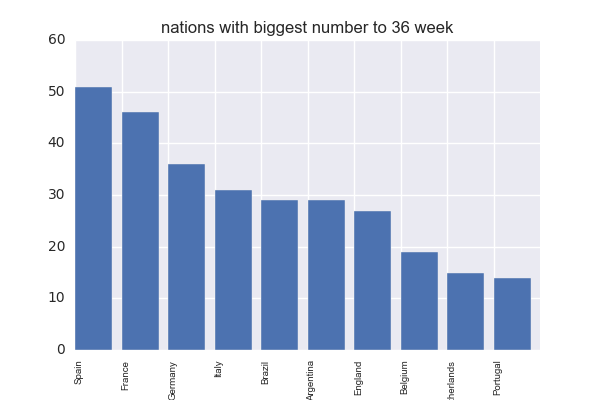
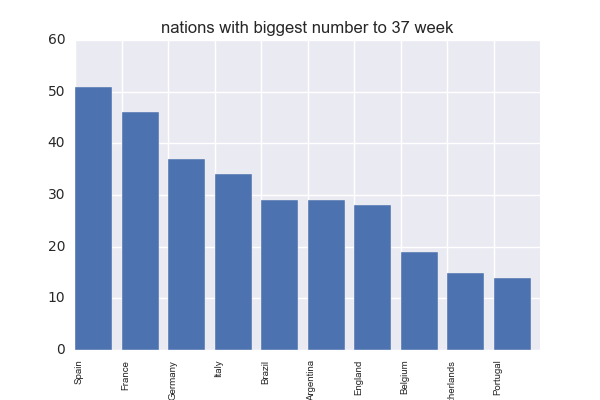
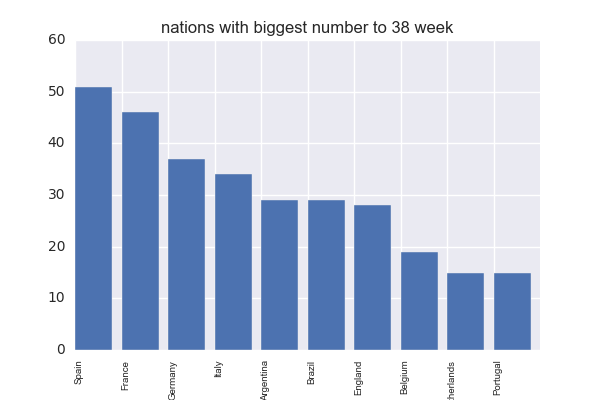
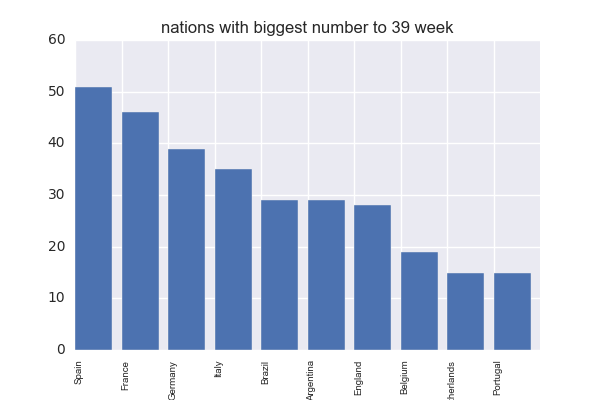

In [9]:
col="nation"
animation.FuncAnimation(fig, animate, frames=range(1,40), interval=1000, )


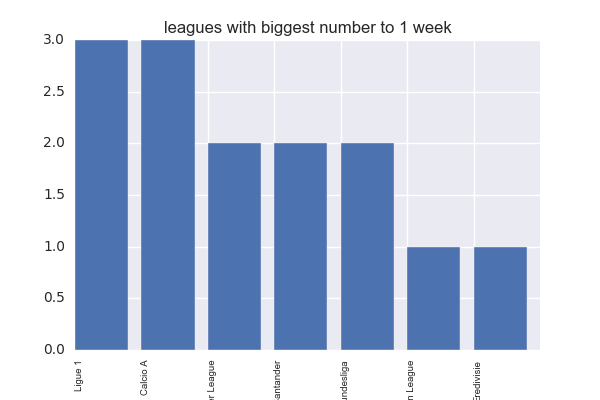
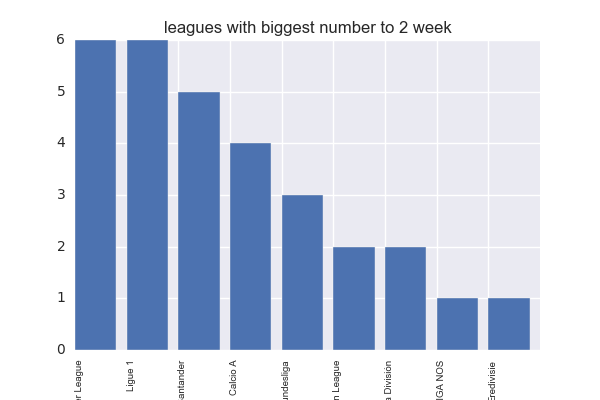
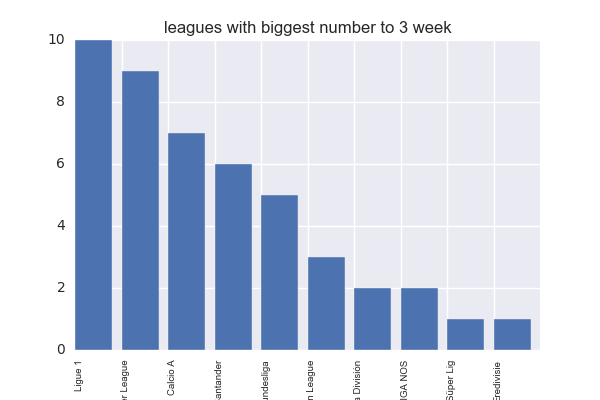
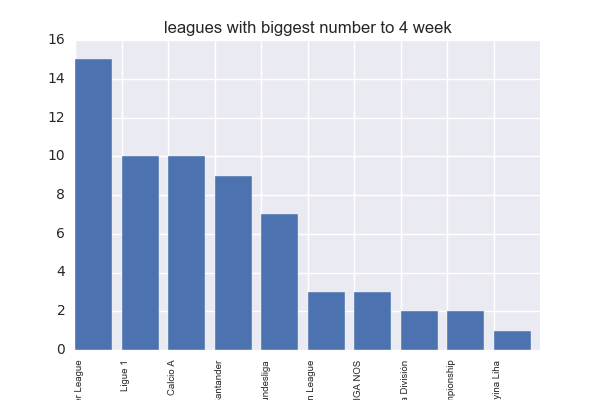
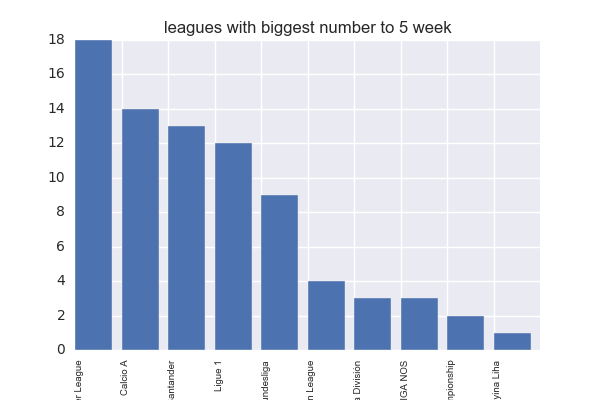
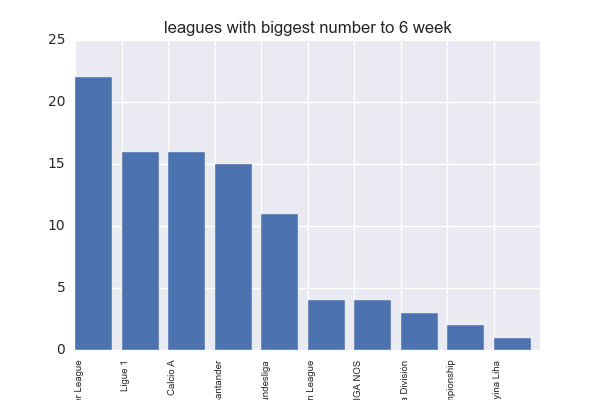
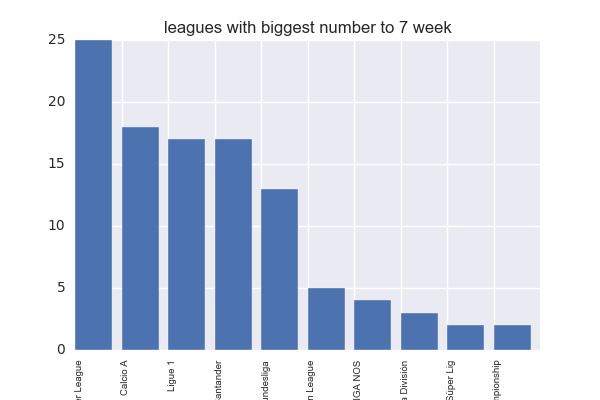
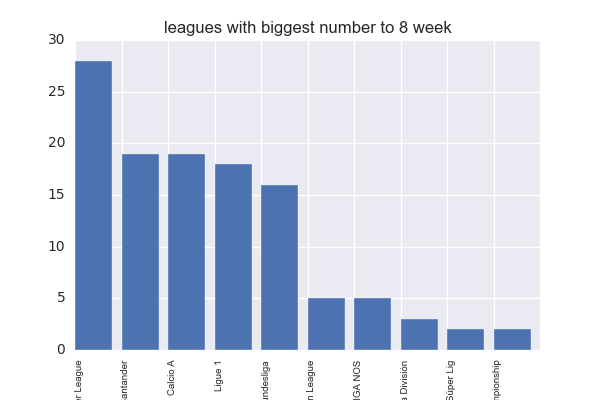
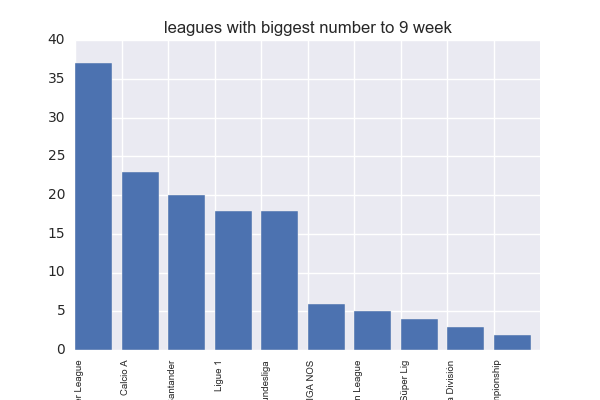
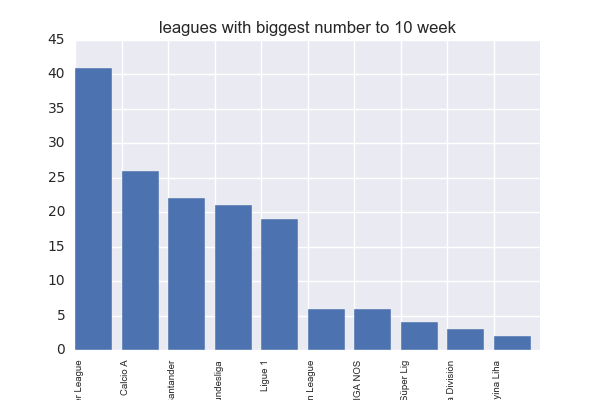
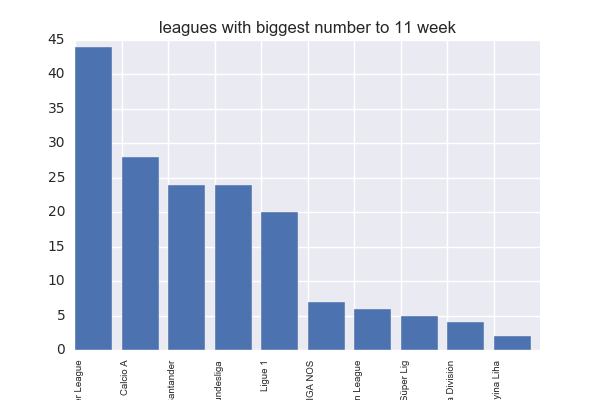
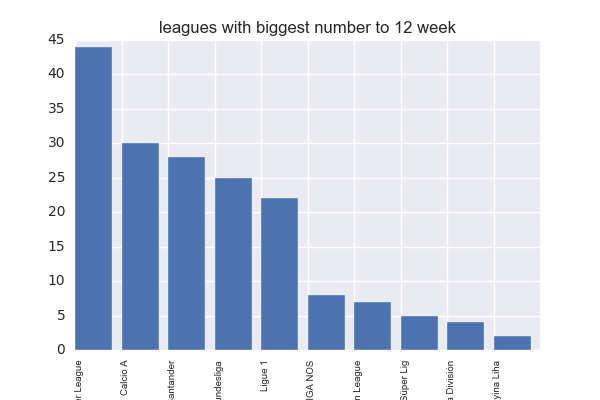
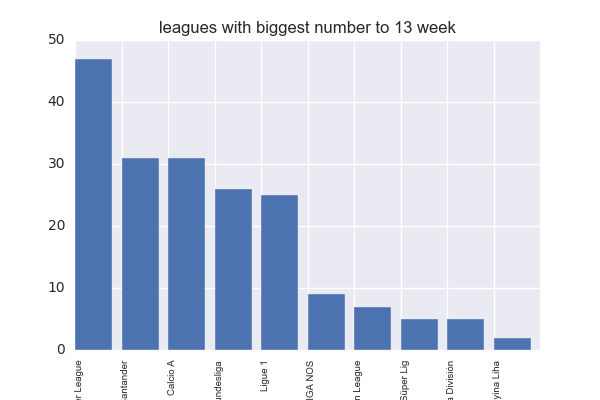
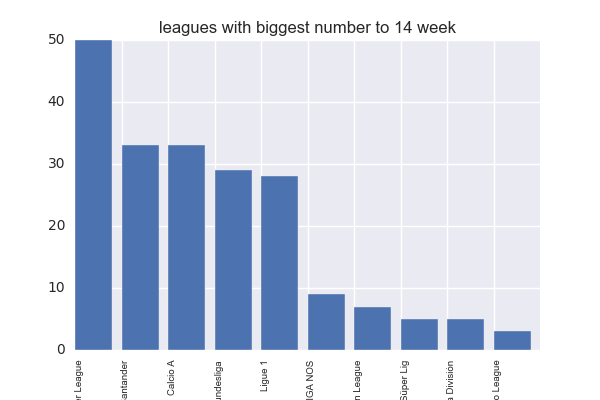
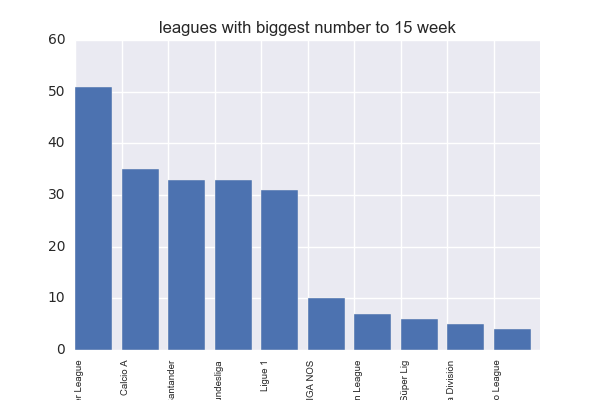
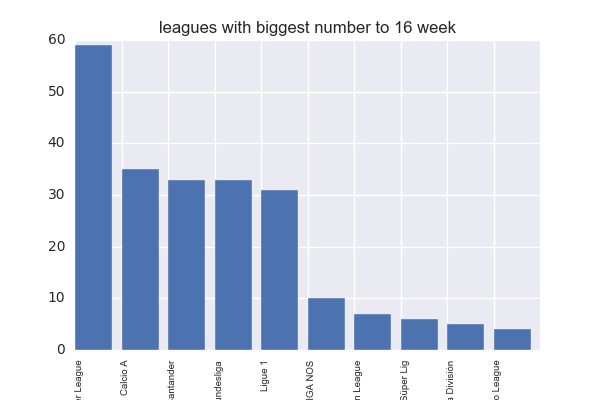
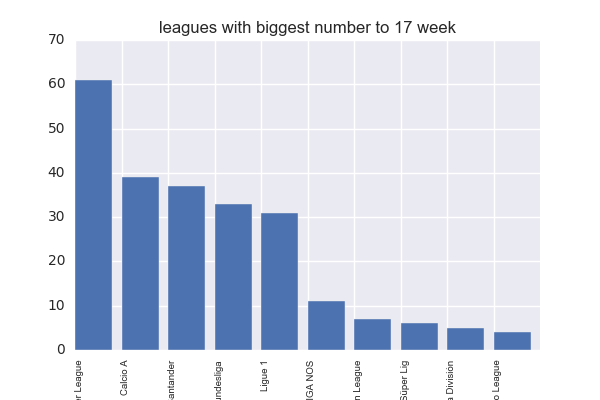
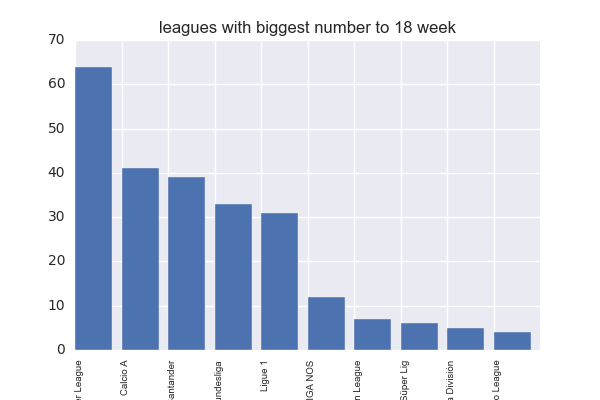
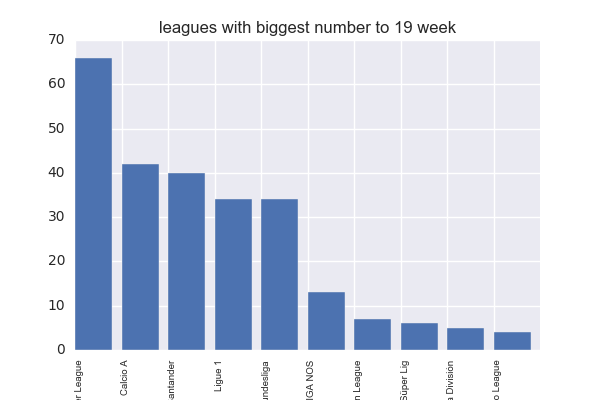
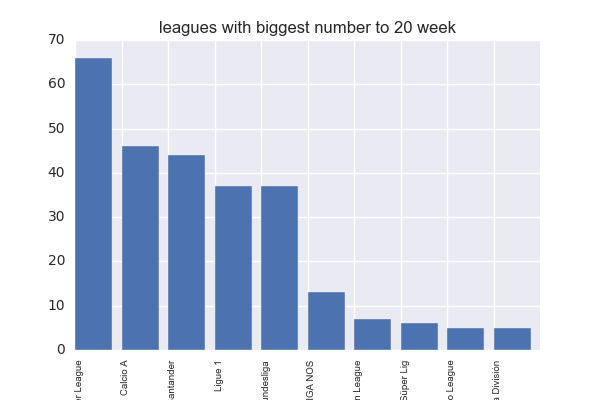
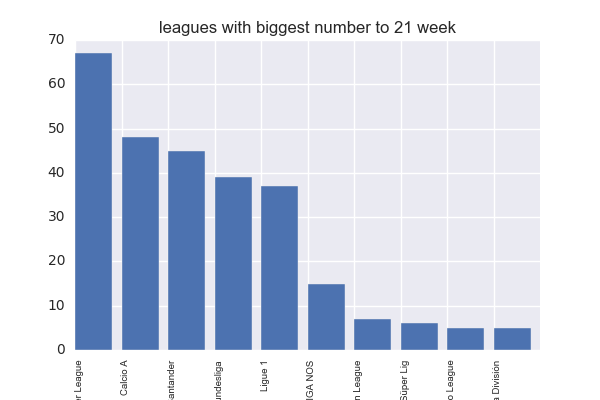
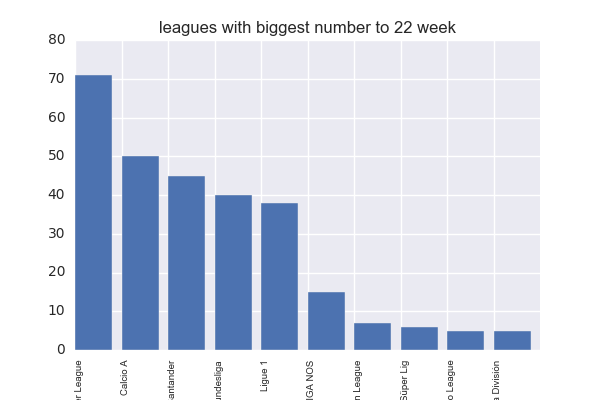
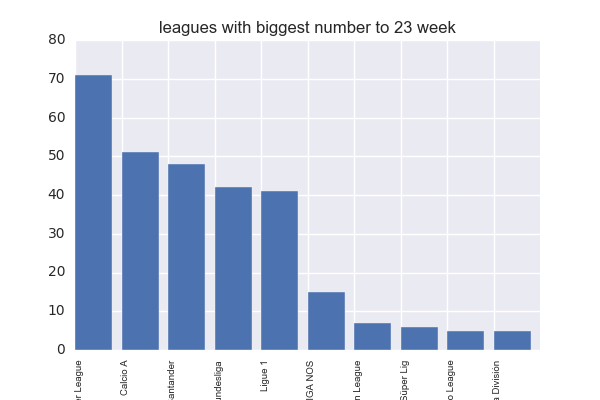
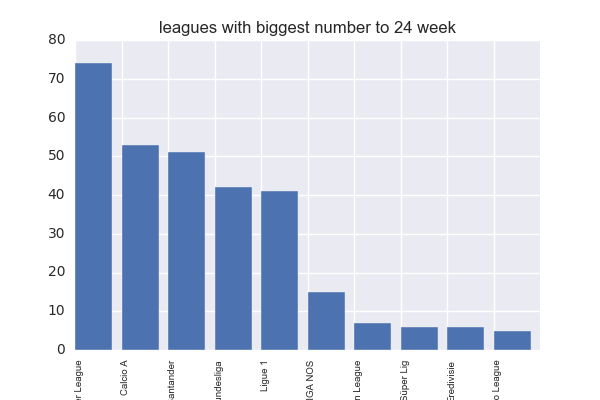
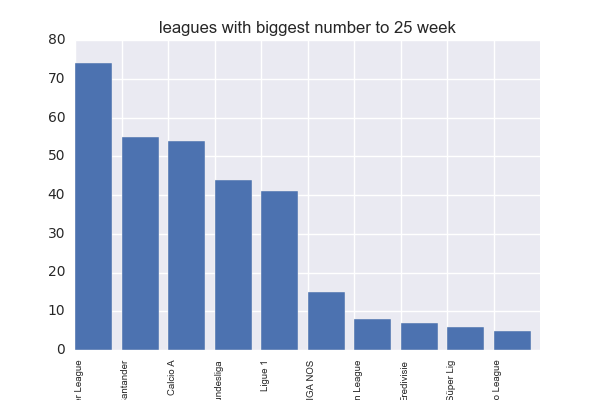
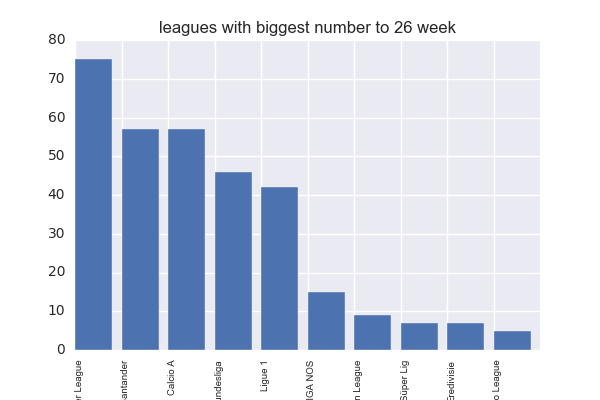
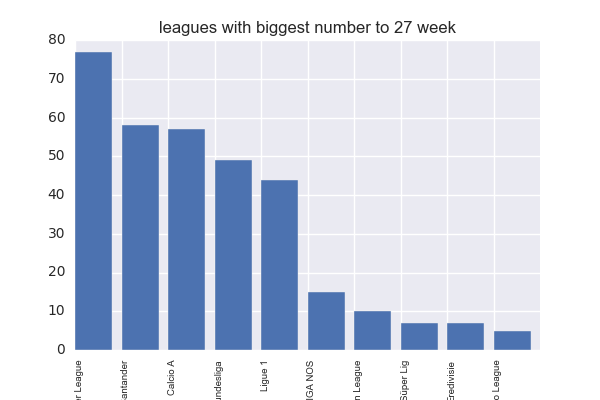
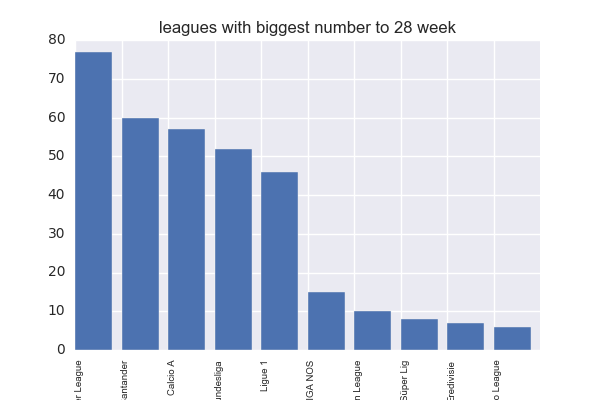
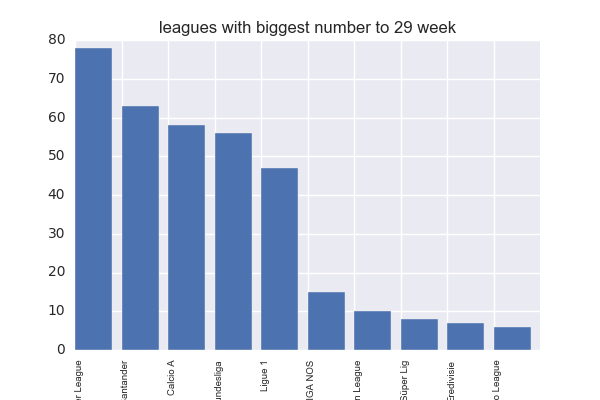
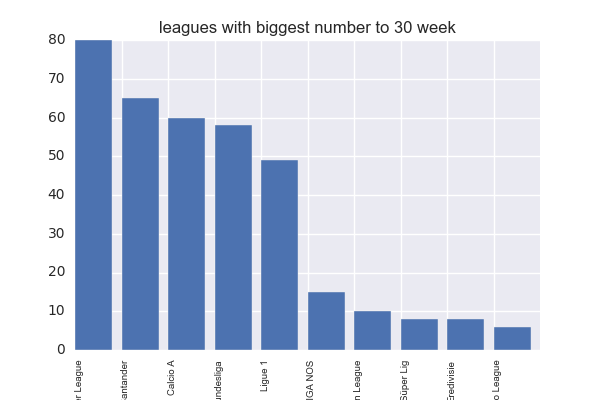
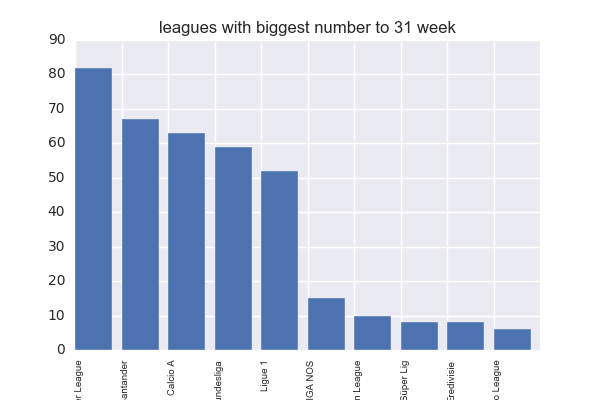
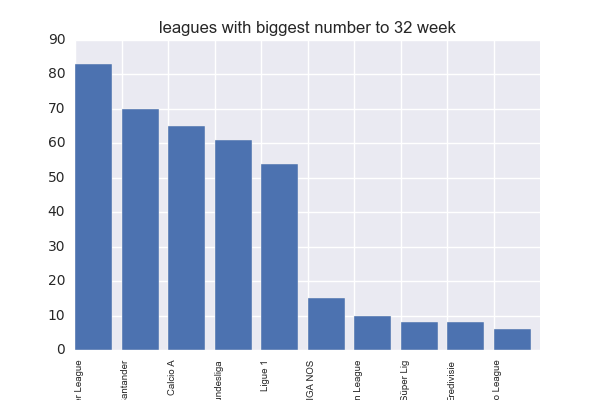
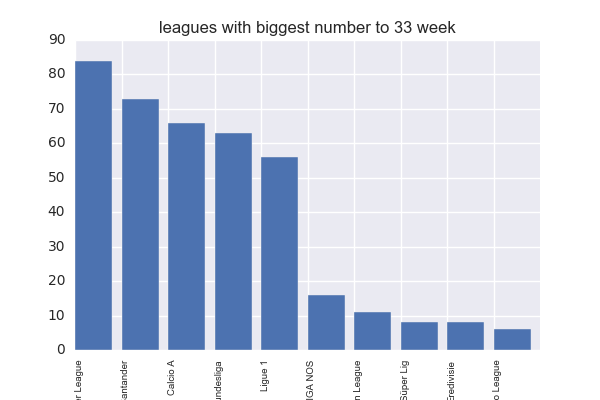
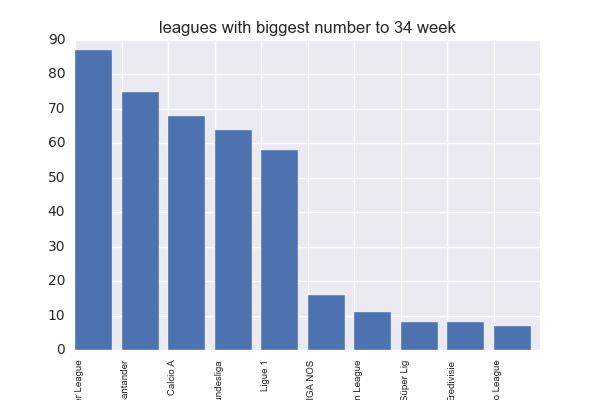
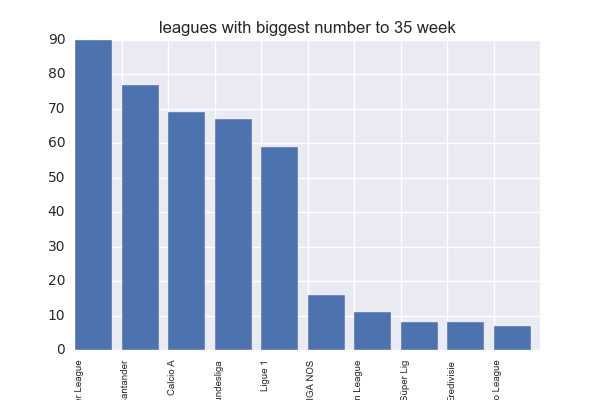
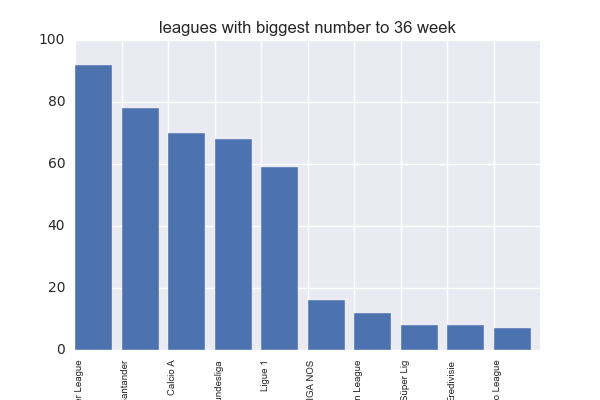
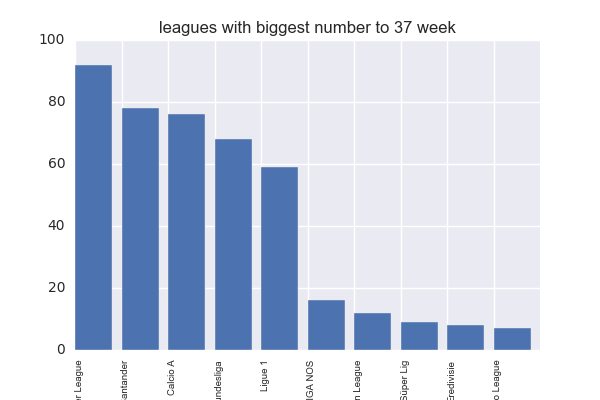
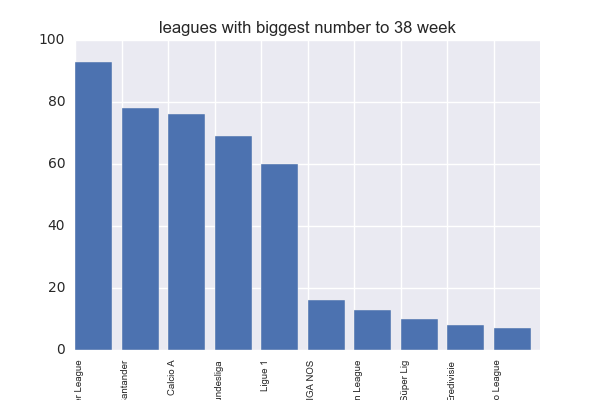
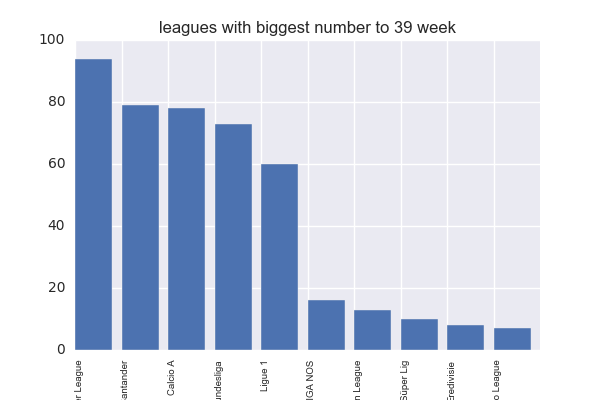

In [10]:
col="league"
animation.FuncAnimation(fig, animate, frames=range(1,40), interval=1000, )

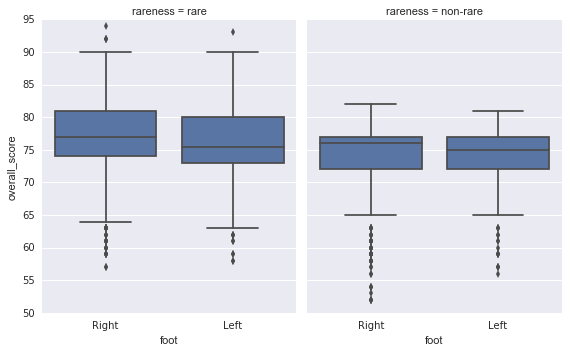

In [11]:
g = sns.FacetGrid(df[df["revision"] == "Normal"], col="rareness", size=5, aspect=.8)
g.map(sns.boxplot, "foot", "overall_score")

In [12]:
characteristcs = ['dribbling', 'defending', 'shot', 'pace', 'passing', 'physicality']

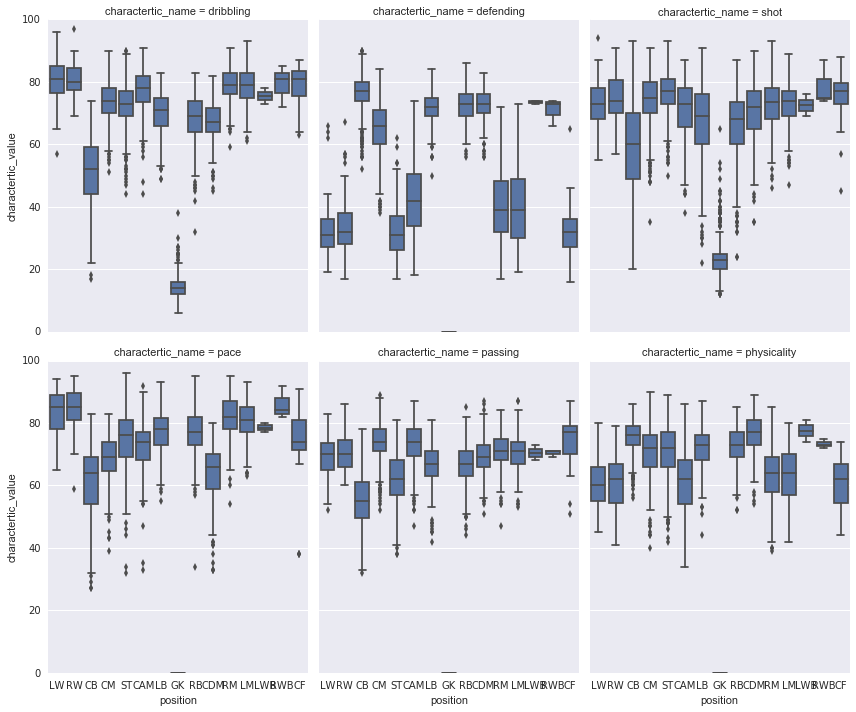

In [13]:
temp = pd.melt(df[df["revision"] == "Normal"], id_vars=['position'], value_vars=characteristcs)
temp.columns = ["position", "charactertic_name", "charactertic_value"]
g = sns.FacetGrid(temp, col="charactertic_name", size=5, aspect=.8, col_wrap=3)
g.map(sns.boxplot, "position", "charactertic_value")